In [5]:
import os 
import json
import pandas as pd
import seaborn as sns
import numpy as np

from utils.analysys_utils import list_experiments_in_dir

In [6]:
experiments_path = os.path.join(os.getcwd(), "derivative_reg", "sidarthe_extended", "Italy")
experiments = list_experiments_in_dir(experiments_path)

# sort experiments by derivative regularization term
experiments.sort(key=lambda exp: exp['settings']['der_1st_reg'])

In [16]:
# generate data for graphs

# use value of derivative regularization as x axis
x_axis = []
val_losses = []
der_losses = []
ratios = []
for exp in experiments:
    der_1st_reg = exp['settings']['der_1st_reg']
    x_axis.append(der_1st_reg)
    
    val_loss = exp['final']['best_epoch']['val_loss']
    val_losses.append(val_loss)
    # normalize w.r.t. regularization weight
    if der_1st_reg != 0.:
        der_1st_loss = exp['final']['best_epoch']['losses']['der_1st'] / der_1st_reg
    else:
        der_1st_loss = 0.

    der_losses.append(der_1st_loss)
    ratios.append(der_1st_loss / val_loss)


data = {"der_reg": x_axis, "validation": val_losses, "derivative": der_losses, "ratio": ratios}

[None, None]

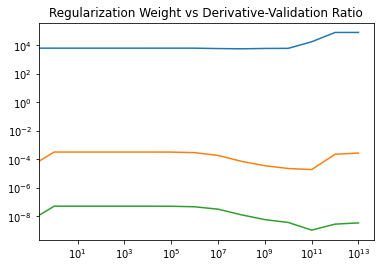

In [31]:
# plot regularization weight vs validation loss
plot = sns.lineplot(data=data, x="der_reg", y="validation")
plot.set(xscale="log", yscale="log")
plot.set_title("Regularization Weight vs Validation Loss")

[None, None]

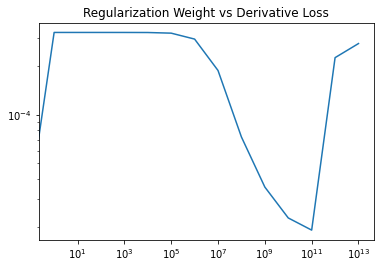

In [25]:
# plot regularization weight vs derivative loss
plot = sns.lineplot(data=data, x="der_reg", y="derivative")
plot.set_title("Regularization Weight vs Derivative Loss")
plot.set(xscale="log", yscale="log")

[None, None]

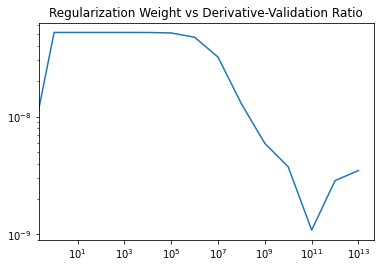

In [26]:
# plot regularization weight vs ratio of validation and derivative loss
plot = sns.lineplot(data=data, x="der_reg", y="ratio")
plot.set_title("Regularization Weight vs Derivative-Validation Ratio")
plot.set(xscale="log", yscale="log")